In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import  train_test_split , GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Digit Recognizer/train.csv')
df.shape

(42000, 785)

In [3]:
df.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df['label'].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [5]:
x = df.iloc[: , 1: ].values
y = df.iloc[:,0].values

x.shape , y.shape

((42000, 784), (42000,))

In [6]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
y

array([1, 0, 1, ..., 7, 6, 9])

In [8]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 9)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


In [10]:
clf = DecisionTreeClassifier()

In [11]:
clf.fit(x_train , y_train)

DecisionTreeClassifier()

### performing a test

In [12]:
# randomally selecting a x_test
print(x_test[100])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  15  24  66 138 139 212 253 253 253 255
 253 137  15   0   0   0   0   0   0   0   0   0   0   0   0  60 109 162
 219 252 252 252 253 252 252 252 252 211 231 252 160   0   0   0   0   0
   0   0   0   0   0   0   0 176 252 253 252 252 252 252 215 162  69  69
  69   7  37  69  44   0   0   0   0   0   0   0   0   0   0   0  57 244
 252 253 235 128  45  45  21   0   0   0   0   0   

In [13]:
y_test[100]

5

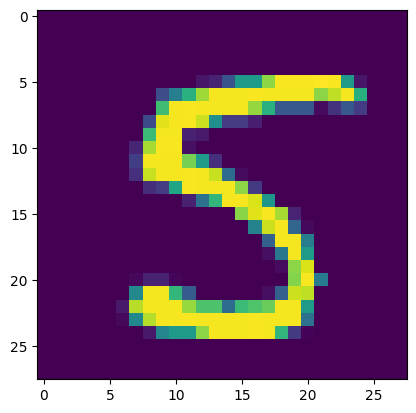

In [14]:
# original size of picture is 28 X 28
plt.imshow(x_test[100].reshape(28,28))

In [15]:
x_test[100].shape

(784,)

In [16]:
x_test[100].reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,
         24,  66, 138, 139, 212, 253, 253, 253, 255, 253, 137,  15,   0,
          0,   0],
       [  

In [17]:
y_test[100]

5

In [18]:
if clf.predict(x_test[100].reshape(1,784))[0] == 5:
  print('Right Prediction')
else :
  print('Wrong Prediction')

Right Prediction


In [19]:
clf.predict(x_test[100].reshape(1,784))[0]

5

In [20]:
y_pred = clf.predict(x_test)

In [21]:
accuracy_score(y_test , y_pred)

0.8486904761904762

[Text(0.39690477659942497, 0.9886363636363636, 'x[409] <= 0.5\ngini = 0.9\nsamples = 33600\nvalue = [3331, 3716, 3348, 3466, 3264, 3028, 3334, 3546, 3228\n3339]'),
 Text(0.15432571726595096, 0.9659090909090909, 'x[434] <= 0.5\ngini = 0.816\nsamples = 11144\nvalue = [2783, 3274, 916, 690, 177, 1316, 634, 358, 852, 144]'),
 Text(0.07782357543012516, 0.9431818181818182, 'x[455] <= 5.5\ngini = 0.555\nsamples = 4203\nvalue = [2735, 8, 207, 246, 44, 416, 236, 223, 35, 53]'),
 Text(0.04271878369509165, 0.9204545454545454, 'x[323] <= 8.0\ngini = 0.821\nsamples = 1484\nvalue = [386, 8, 137, 220, 12, 349, 160, 171, 25, 16]'),
 Text(0.017626927945244012, 0.8977272727272727, 'x[489] <= 1.0\ngini = 0.721\nsamples = 743\nvalue = [344, 2, 75, 6, 8, 115, 100, 80, 4, 9]'),
 Text(0.008579063335052272, 0.875, 'x[183] <= 1.5\ngini = 0.509\nsamples = 499\nvalue = [339, 1, 23, 4, 3, 19, 27, 76, 2, 5]'),
 Text(0.003375369181004172, 0.8522727272727273, 'x[570] <= 16.0\ngini = 0.577\nsamples = 120\nvalue = [26

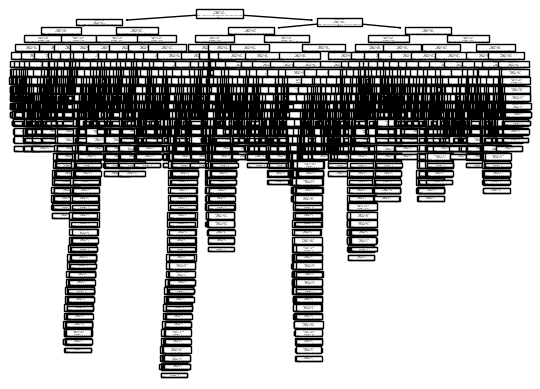

In [22]:
from sklearn.tree import plot_tree

plot_tree(clf)